# Import

In [0]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib. pyplot as plt

# Dataset

In [0]:
# Use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Initialize hyperparameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# Download MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

Lable for this image is: 5


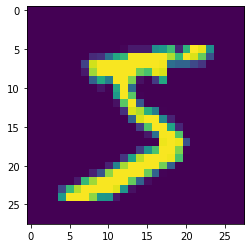

In [0]:
plt.imshow(train_dataset[0][0][0])
print('Lable for this image is:', train_dataset[0][1])

# Model Architecture

In [0]:
# CNN (conv + pooling + conv + pooling + fc)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        # Inheritance from Pytorch
        super(ConvNet, self).__init__()

        # Conv2d: Input shape (_,_,1), kernel shape (5,5,1), 20 filters, stride 1, padding 2
        # ReLU
        # MaxPool2d: kernel shape (2,2,20), stride 2
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=20,kernel_size=5,stride=1,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))
        
        # Conv2d: Input shape (_,_,1), kernel shape (5,5,20), 40 filters, stride 1, padding 2
        # ReLU
        # MaxPool2d: kernel shape (2,2,20), stride 2
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=20,out_channels=40,kernel_size=5,stride=1,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))
        
        # fc: use Linear as the fully connected layer
        self.fc = nn.Linear(40*7*7,10)
        
    def forward(self, x):
        # pass through layer1
        out = self.layer1(x)

        # pass through layer2
        out = self.layer2(out)


        # flatten the feature map
        out = out.flatten(start_dim=1)

        # pass through fully connected layer
        out = self.fc(out)

        return out

# Model Traning

In [0]:
# Initialize the model
model = ConvNet(num_classes).to(device)

# Loss and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # This is Pytorch syntax to use CPU/GPU
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass

        # call model forward and get the outputs
        outputs = model.forward(images)
        # compute the loss so that we can monitor it
        loss = loss_function(outputs,labels)
        
        # Backward pass

        # compute the gradient
        loss.backward()
        # update the weights
        optimizer.step()
        # set all the gradient variables zero
        optimizer.zero_grad()
        
    print ('Epoch {}, Loss: {:.4f}'.format(epoch+1, loss.item()))


Epoch 1, Loss: 2.2156
Epoch 2, Loss: 1.9025
Epoch 3, Loss: 1.0757
Epoch 4, Loss: 0.7247
Epoch 5, Loss: 0.5164


# Model Evaluation

In [0]:
# Turn on eval mode
model.eval()  

# Test in no gradient descent environment
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        # This is Pytorch syntax to use CPU/GPU
        images = images.to(device)
        labels = labels.to(device)

        # Call model forward and get the outputs
        outputs = model.forward(images)
        # Use argmax to find the class with highest probability
        # make sure the shape of predicted and labels are the same
        _, predicted = torch.max(outputs.data,1)
        correct += (predicted==labels).sum().item()

        total += labels.size(0)
    print('Test Accuracy: {} %'.format(100 * correct / total))

# Save the model checkpoint so we can reuse it
torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy: 87.91 %
